In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)

In [2]:
# Build a PyTorch regression model to estimate z = 2x + 5y - 4. 
# Create a dataset

def create_dataset(n_samples=1000):
    x = torch.randint(-50, 50, (n_samples, 1))
    y = torch.randint(-50, 50, (n_samples, 1))
    z = 2*x + 5*y -4
    targets = z.float()
    # Combine x and y into features
    features = torch.cat([x, y], dim=1).float()
    return features, targets

In [3]:
# Prepare data
features, targets = create_dataset(1000)

In [4]:
print(features.shape)
print(targets.shape)

torch.Size([1000, 2])
torch.Size([1000, 1])


In [5]:
# Split train and test dataset

def split_train_test(features, targets, rate=0.8):
    train_size = int((rate*len(features)))
    
    train_features = features[:train_size]
    test_features = features[train_size:]

    train_targets = targets[:train_size]
    test_targets = targets[train_size:]

    return train_features, train_targets, test_features, test_targets

In [6]:
# The rest of the code remains the same...
X_train, y_train, X_test, y_test = split_train_test(features, targets, 0.8)

In [7]:
print(f"lenght of X_train is {len(X_train)}, and lenght of y_train is {len(y_train)}")
print(f"lenght of X_test is {len(X_test)}, and lenght of y_test is {len(y_test)}")

lenght of X_train is 800, and lenght of y_train is 800
lenght of X_test is 200, and lenght of y_test is 200


In [8]:
# Step 1. Define the neural network model
# Input layer
# No hidden layer
# Output layer

class MyRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

In [9]:
# Initialize model, loss function, and optimizer
# Using learning rate: lr=0.01
model_1 = MyRegressionModel(input_size=2, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.01)

In [10]:
# Training loop with both train and test loss tracking
# Train model: just assess train_losses

def train_model_simple(model, train_features, train_targets, epochs=1000):
    model.train()
    train_losses = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_predictions = model(train_features)
        train_loss = criterion(train_predictions, train_targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        train_losses.append(train_loss.item())
        
        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss.item():.4f}')
    
    return train_losses

In [11]:
# Train the model
# Train model with 100 epoches
print("Training the model...")
train_losses = train_model_simple(model_1, X_train, y_train, epochs=100)

Training the model...
Epoch [0/100], Train Loss: 28725.8281


In [12]:
# Evaluate the model
def evaluate_model(model, test_features, test_targets):
    model.eval()
    with torch.no_grad():
        predictions = model(test_features)
        loss = criterion(predictions, test_targets)
        return loss.item(), predictions

# Test the model
test_loss, test_predictions = evaluate_model(model_1, X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")


Test Loss: 19162.4180


In [13]:
# Make predictions on new data
def predict(model, x_val, y_val):
    model.eval()
    with torch.no_grad():
        # Ensure input is float tensor
        input_tensor = torch.tensor([[x_val, y_val]], dtype=torch.float32)
        prediction = model(input_tensor)
        return prediction.item()

print(predict(model_1, 5, 3))

4.797336101531982


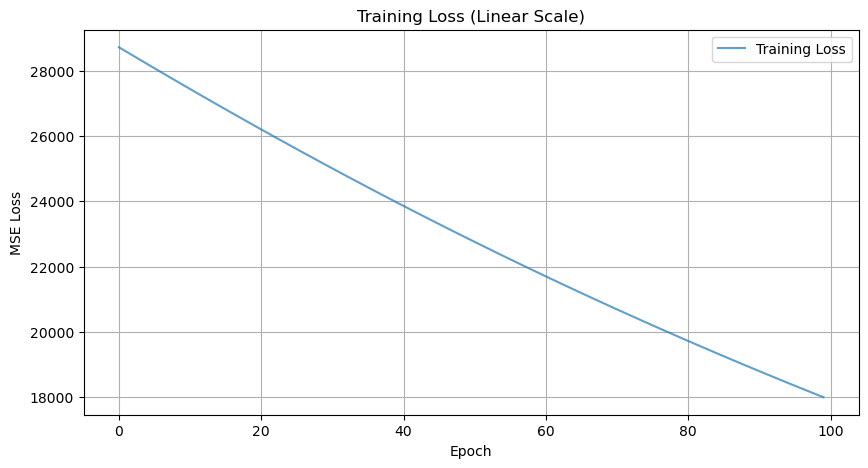

In [14]:
# Plot training and test losses
plt.figure(figsize=(10, 5))

# Plot 1: Linear scale
plt.plot(train_losses, label='Training Loss', alpha=0.7)
plt.title('Training Loss (Linear Scale)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

In [15]:
# Initialize model, loss function, and optimizer
# Using same architecture as model 1.
model_2 = MyRegressionModel(input_size=2, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.01)

In [16]:
# Training loop with both train and test loss tracking
# Also assess test_losses

def train_model(model, train_features, train_targets, test_features, test_targets, epochs=300):
    model.train()
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_predictions = model(train_features)
        train_loss = criterion(train_predictions, train_targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        # Evaluation phase
        model.eval()
        with torch.no_grad():
            test_predictions = model(test_features)
            test_loss = criterion(test_predictions, test_targets)
        
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        
        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
    
    return train_losses, test_losses

In [17]:
# Train the model
# Using 100 epoches
print("Training the model...")
train_losses_model_2, test_losses_model_2 = train_model(model_2, X_train, y_train, X_test, y_test, epochs=1000)

Training the model...
Epoch [0/1000], Train Loss: 25897.8516, Test Loss: 27848.7891
Epoch [100/1000], Train Loss: 15495.7227, Test Loss: 16572.2246
Epoch [200/1000], Train Loss: 8999.0332, Test Loss: 9543.8936
Epoch [300/1000], Train Loss: 5102.9771, Test Loss: 5359.0723
Epoch [400/1000], Train Loss: 2796.2954, Test Loss: 2911.7173
Epoch [500/1000], Train Loss: 1454.5133, Test Loss: 1506.2072
Epoch [600/1000], Train Loss: 707.8521, Test Loss: 731.1303
Epoch [700/1000], Train Loss: 319.5274, Test Loss: 329.8859
Epoch [800/1000], Train Loss: 133.1045, Test Loss: 137.5401
Epoch [900/1000], Train Loss: 50.9857, Test Loss: 52.7778


In [18]:
# Evaluate the model
def evaluate_model(model, test_features, test_targets):
    model.eval()
    with torch.no_grad():
        predictions = model(test_features)
        loss = criterion(predictions, test_targets)
        return loss.item(), predictions

# Test the model
test_loss, test_predictions = evaluate_model(model_2, X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")


Test Loss: 18.7847


In [19]:
# Make predictions on new data
def predict(model, x_val, y_val):
    model.eval()
    with torch.no_grad():
        # Ensure input is float tensor
        input_tensor = torch.tensor([[x_val, y_val]], dtype=torch.float32)
        prediction = model(input_tensor)
        return prediction.item()

print(predict(model_2, 5, 3))

20.395313262939453


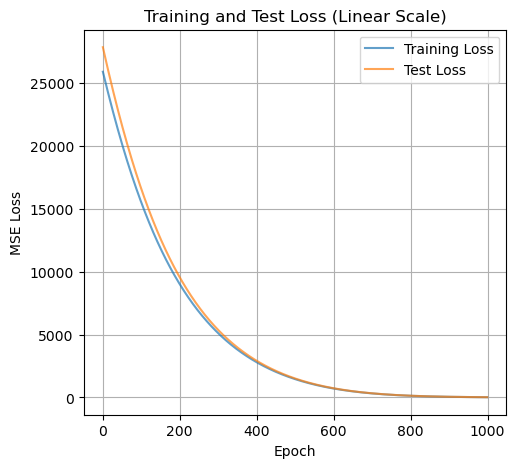

In [20]:
# Plot training and test losses

def plot_loss_test_train(train_losses, test_losses, alpha=0.7):
    plt.figure(figsize=(12, 5))

    # Plot 1: Linear scale
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', alpha=0.7)
    plt.plot(test_losses, label='Test Loss', alpha=0.7)
    plt.title('Training and Test Loss (Linear Scale)')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

plot_loss_test_train(train_losses_model_2, test_losses_model_2)

In [21]:
# Initialize model, loss function, and optimizer
# Using same architectire as model_1 and model_2
model_3 = MyRegressionModel(input_size=2, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_3.parameters(), lr=0.01)

In [22]:
# Train the model
# Using 1000 epoches
print("Training the model...")
train_losses_model_3, test_losses_model_3 = train_model(model_3, X_train, y_train, X_test, y_test, epochs=1000)

Training the model...
Epoch [0/1000], Train Loss: 23881.4707, Test Loss: 25632.7246
Epoch [100/1000], Train Loss: 14088.8047, Test Loss: 15013.4629
Epoch [200/1000], Train Loss: 8104.4287, Test Loss: 8547.2559
Epoch [300/1000], Train Loss: 4556.1152, Test Loss: 4753.1899
Epoch [400/1000], Train Loss: 2459.2078, Test Loss: 2544.8052
Epoch [500/1000], Train Loss: 1248.7024, Test Loss: 1286.3805
Epoch [600/1000], Train Loss: 588.8347, Test Loss: 605.5381
Epoch [700/1000], Train Loss: 256.0696, Test Loss: 263.2864
Epoch [800/1000], Train Loss: 102.2375, Test Loss: 105.1933
Epoch [900/1000], Train Loss: 37.3460, Test Loss: 38.4779


In [23]:
# Evaluate the model
def evaluate_model(model, test_features, test_targets):
    model.eval()
    with torch.no_grad():
        predictions = model(test_features)
        loss = criterion(predictions, test_targets)
        return loss.item(), predictions

# Test the model
test_loss, test_predictions = evaluate_model(model_3, X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")


Test Loss: 12.9943


In [24]:
# Make predictions on new data
def predict(model, x_val, y_val):
    model.eval()
    with torch.no_grad():
        # Ensure input is float tensor
        input_tensor = torch.tensor([[x_val, y_val]], dtype=torch.float32)
        prediction = model(input_tensor)
        return prediction.item()

print(predict(model_3, 5, 3))

20.570972442626953


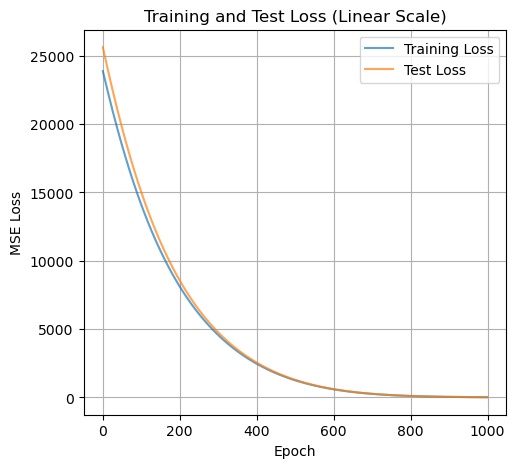

In [25]:
# Plot training and test losses

def plot_loss_test_train(train_losses, test_losses, alpha=0.7):
    plt.figure(figsize=(12, 5))

    # Plot 1: Linear scale
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', alpha=0.7)
    plt.plot(test_losses, label='Test Loss', alpha=0.7)
    plt.title('Training and Test Loss (Linear Scale)')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

plot_loss_test_train(train_losses_model_3, test_losses_model_3)

In [26]:
# PyTorch Model with One Hidden Layer
# Using One hidden layer in its architecture.

class OneHiddenLayerRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(OneHiddenLayerRegressionModel, self).__init__()
        
        # Define layers
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        
        # Activation function
        self.activation = nn.ReLU()
    
    def forward(self, x):
        # Input to hidden layer
        x = self.hidden(x)
        x = self.activation(x)
        # Hidden to output layer
        x = self.output(x)
        return x

In [27]:
# Usage
model_4 = OneHiddenLayerRegressionModel(input_dim=2, hidden_dim=4, output_dim=1)
print(model_4)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_4.parameters(), lr=0.01)

OneHiddenLayerRegressionModel(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (activation): ReLU()
)


In [28]:
# Train the model
print("Training the model...")
train_losses_model_4, test_losses_model_4 = train_model(model_4, X_train, y_train, X_test, y_test, epochs=1000)

Training the model...
Epoch [0/1000], Train Loss: 24469.5547, Test Loss: 26204.1992
Epoch [100/1000], Train Loss: 5152.5669, Test Loss: 4983.8516
Epoch [200/1000], Train Loss: 10.9680, Test Loss: 8.4957
Epoch [300/1000], Train Loss: 8.2202, Test Loss: 7.2575
Epoch [400/1000], Train Loss: 7.5831, Test Loss: 6.7254
Epoch [500/1000], Train Loss: 6.9322, Test Loss: 6.1780
Epoch [600/1000], Train Loss: 6.2857, Test Loss: 5.6329
Epoch [700/1000], Train Loss: 5.6500, Test Loss: 5.0846
Epoch [800/1000], Train Loss: 5.0419, Test Loss: 4.5564
Epoch [900/1000], Train Loss: 4.4669, Test Loss: 4.0542


In [29]:
# Test the model
test_loss, test_predictions = evaluate_model(model_4, X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")


Test Loss: 3.5747


In [30]:
print(predict(model_4, 5, 3))

25.951021194458008


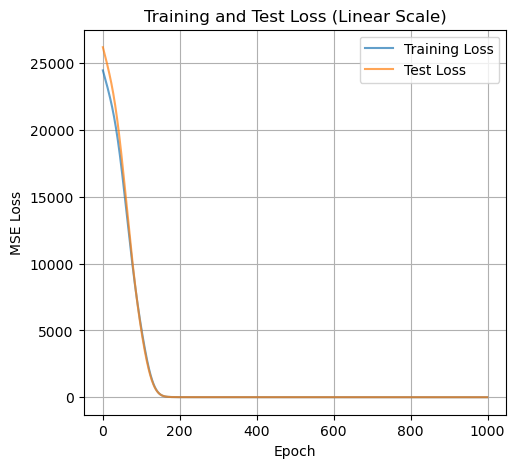

In [31]:
plot_loss_test_train(train_losses_model_4, test_losses_model_4)

In [32]:
# PyTorch Model with two Hidden Layer
# Using 2 hidden layers

class TwoHiddenLayerRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, output_dim=1):
        super(TwoHiddenLayerRegressionModel, self).__init__()
        
        # Define layers
        self.hidden1 = nn.Linear(input_dim, hidden1_dim)
        self.hidden2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.output = nn.Linear(hidden2_dim, output_dim)
        
        # Activation function
        self.activation = nn.ReLU()
    
    def forward(self, x):
        # Input to first hidden layer
        x = self.hidden1(x)
        x = self.activation(x)
        
        # First to second hidden layer
        x = self.hidden2(x)
        x = self.activation(x)
        
        # Second hidden to output layer
        x = self.output(x)
        return x

In [33]:
# Usage
# Change learning rate from 0.01 to 0.1

model_5 = TwoHiddenLayerRegressionModel(input_dim=2, hidden1_dim=4, hidden2_dim=4, output_dim=1)
print(model_5)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_5.parameters(), lr=0.01)

TwoHiddenLayerRegressionModel(
  (hidden1): Linear(in_features=2, out_features=4, bias=True)
  (hidden2): Linear(in_features=4, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (activation): ReLU()
)


In [34]:
# Train the model
print("Training the model...")
train_losses_model_5, test_losses_model_5 = train_model(model_5, X_train, y_train, X_test, y_test, epochs=1000)

Training the model...
Epoch [0/1000], Train Loss: 24732.8477, Test Loss: 26605.1973
Epoch [100/1000], Train Loss: 8843.0752, Test Loss: 8573.6611
Epoch [200/1000], Train Loss: 10.4443, Test Loss: 13.9910
Epoch [300/1000], Train Loss: 6.1350, Test Loss: 6.9603
Epoch [400/1000], Train Loss: 4.6686, Test Loss: 5.1056
Epoch [500/1000], Train Loss: 3.4911, Test Loss: 3.7016
Epoch [600/1000], Train Loss: 2.4550, Test Loss: 2.4612
Epoch [700/1000], Train Loss: 1.6771, Test Loss: 1.5773
Epoch [800/1000], Train Loss: 1.1397, Test Loss: 0.9913
Epoch [900/1000], Train Loss: 0.7825, Test Loss: 0.6339


In [35]:
# Test the model
test_loss, test_predictions = evaluate_model(model_5, X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")


Test Loss: 0.4029


In [36]:
print(predict(model_5, 5, 3))

22.391748428344727


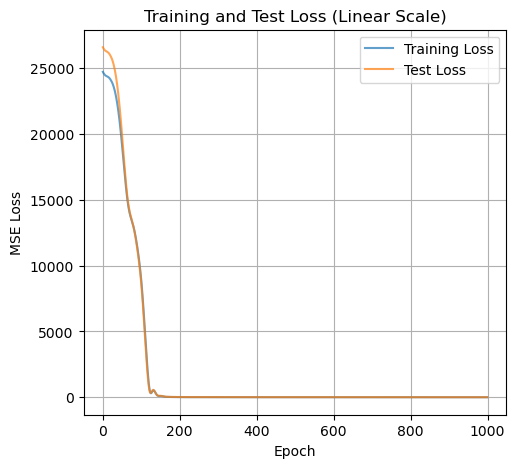

In [37]:
plot_loss_test_train(train_losses_model_5, test_losses_model_5)

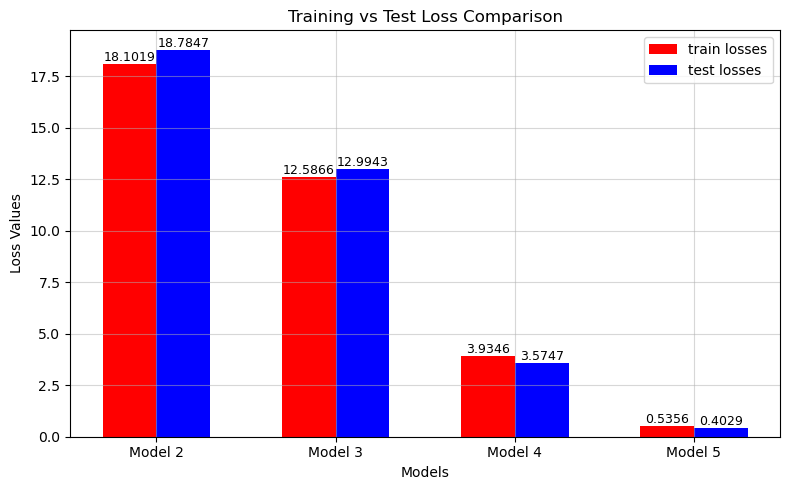

In [38]:
# plot all models results together

# Collect all train and test losses


train_losses = [
        train_losses_model_2[-1], train_losses_model_3[-1],
        train_losses_model_4[-1], train_losses_model_5[-1]
    ]
    
test_losses = [
        test_losses_model_2[-1], test_losses_model_3[-1],
        test_losses_model_4[-1], test_losses_model_5[-1]
    ]

model_names = ['Model 2', 'Model 3', 'Model 4', 'Model 5']

x = np.arange(len(model_names))
bar_width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - bar_width/2, train_losses, width=bar_width, label = "train losses", color="red")
bars2 = ax.bar(x + bar_width/2, test_losses, width=bar_width, label = "test losses", color="blue")

# Customize plot
ax.set_xlabel('Models')
ax.set_ylabel('Loss Values')
ax.set_title('Training vs Test Loss Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.grid(True, alpha=0.5)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

plt.tight_layout()
plt.show()


In [39]:
print(torch.__version__)

2.6.0


In [40]:
# First install: pip install torchsummary
from torchsummary import summary

summary(model_5, input_size = features.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1000, 4]              12
              ReLU-2              [-1, 1000, 4]               0
            Linear-3              [-1, 1000, 4]              20
              ReLU-4              [-1, 1000, 4]               0
            Linear-5              [-1, 1000, 1]               5
Total params: 37
Trainable params: 37
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.13
Params size (MB): 0.00
Estimated Total Size (MB): 0.14
----------------------------------------------------------------


In [41]:
class RegressionModelWithDropout(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16, output_dim=1, dropout_rate=0.3):
        super(RegressionModelWithDropout, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),  # Dropout after first hidden layer
            
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(), 
            nn.Dropout(dropout_rate),  # Dropout after second hidden layer
            
            
            nn.Linear(hidden_dim // 2, output_dim)
        )
    
    def forward(self, x):
        return self.network(x)

In [42]:
model_6 = RegressionModelWithDropout(input_dim=2, hidden_dim=16, output_dim=1, dropout_rate=0.1)
summary(model_6, input_size=features.shape)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_6.parameters(), lr=0.1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 1000, 16]              48
              ReLU-2             [-1, 1000, 16]               0
           Dropout-3             [-1, 1000, 16]               0
            Linear-4              [-1, 1000, 8]             136
              ReLU-5              [-1, 1000, 8]               0
           Dropout-6              [-1, 1000, 8]               0
            Linear-7              [-1, 1000, 1]               9
Total params: 193
Trainable params: 193
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.56
Params size (MB): 0.00
Estimated Total Size (MB): 0.57
----------------------------------------------------------------


In [43]:
# Train the model
print("Training the model...")
train_losses_model_6, test_losses_model_6 = train_model(model_6, X_train, y_train, X_test, y_test, epochs=1000)

Training the model...
Epoch [0/1000], Train Loss: 24074.9297, Test Loss: 23031.9609
Epoch [100/1000], Train Loss: 1092.9585, Test Loss: 47.8905
Epoch [200/1000], Train Loss: 1350.8639, Test Loss: 66.2525
Epoch [300/1000], Train Loss: 1066.4835, Test Loss: 151.1564
Epoch [400/1000], Train Loss: 981.3380, Test Loss: 32.1772
Epoch [500/1000], Train Loss: 1041.3729, Test Loss: 100.1903
Epoch [600/1000], Train Loss: 965.6180, Test Loss: 170.3937
Epoch [700/1000], Train Loss: 1005.8789, Test Loss: 38.5847
Epoch [800/1000], Train Loss: 1068.2175, Test Loss: 20.0646
Epoch [900/1000], Train Loss: 910.2463, Test Loss: 82.0982


In [44]:
# Test the model
test_loss, test_predictions = evaluate_model(model_6, X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")


Test Loss: 125.2481


In [45]:
print(predict(model_6, 5, 3))

21.331069946289062


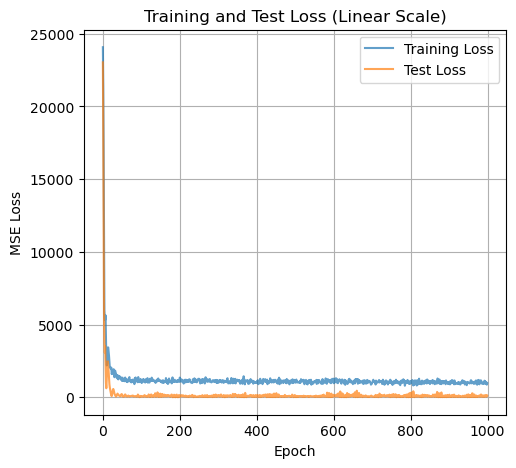

In [46]:
plot_loss_test_train(train_losses_model_6, test_losses_model_6)